P2: Demonstrate the concept of sampling and quantization.<br>
Objective:
To explore the effects of sampling and quantization on image quality using students' own
photographs. This exercise includes visual comparisons and basic quantitative analysis to
understand the trade-offs involved.<br>
<br>
Scenario:
You are a digital imaging specialist working on optimizing high-resolution images for
various applications. Your task is to evaluate how different sampling rates and
quantization levels affect image quality using your own high-resolution photographs.<br>
<br>
Tasks:
1. Image Preprocessing:<br>
○ Use your own high-resolution photograph (minimum 1024x1024 pixels) and convert the picture to grayscale to simplify the analysis.

2. Image Sampling:<br>
○ Downsample the grayscale image to various resolutions (e.g., 512x512,256x256, and 128x128 pixels) using nearest-neighbor interpolation.<br>
○ Observe and interpret the details of each downsampled image's visual changes and potential loss.

3. Image Quantization:<br>
○ Quantize the grayscale image to different levels of intensity (e.g., 256 levels,64 levels, and 4 levels).<br>
○ Observe and interpret how the reduction in quantization levels affects theimage  quality.

4. Visual and Quantitative Analysis:<br>
○ Compare the original, downsampled, and quantized images by plotting histograms of pixel values<br>
○ Visualize the effect of quantization levels.

5. Error Metrics:<br>
○ Calculate the Mean Squared Error (MSE) between the original image and each downsampled and quantized image.<br>
○ Interpret how these error metrics correlate with visual observations.

IMAGE PROCESSING

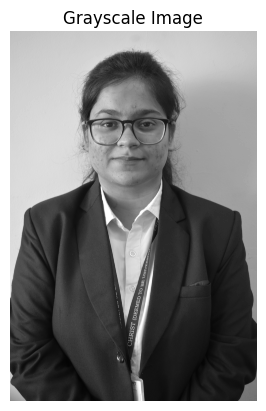

In [9]:
import cv2
import matplotlib.pyplot as plt

image_path = 'myphoto.JPG'
image = cv2.imread(image_path)

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the original grayscale image
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

IMAGE SAMPLING

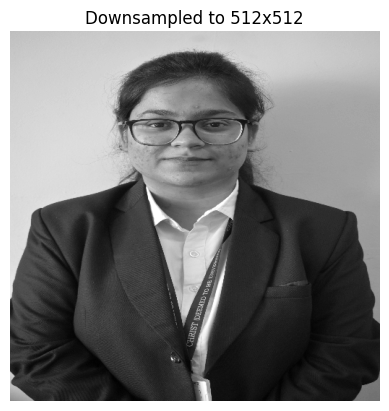

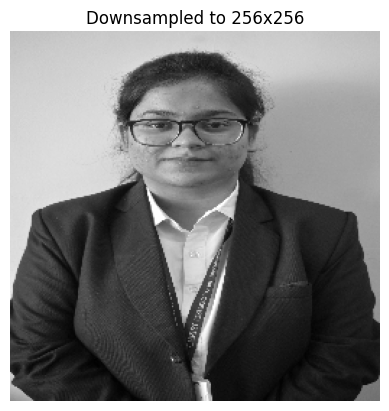

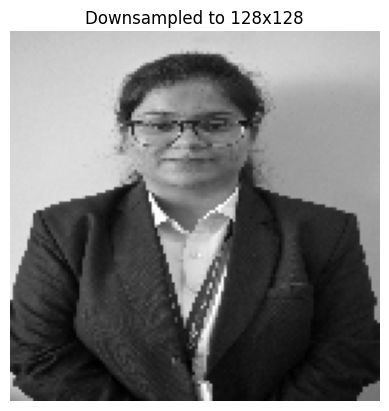

In [10]:
# Downsample image 
resolutions = [512, 256, 128]
downsampled_images = []

for res in resolutions:
    downsampled = cv2.resize(gray_image, (res, res), interpolation=cv2.INTER_NEAREST)
    downsampled_images.append(downsampled)

    # Display downsampled images
    plt.imshow(downsampled, cmap='gray')
    plt.title(f"Downsampled to {res}x{res}")
    plt.axis('off')
    plt.show()


IMAGE QUANTIZATION

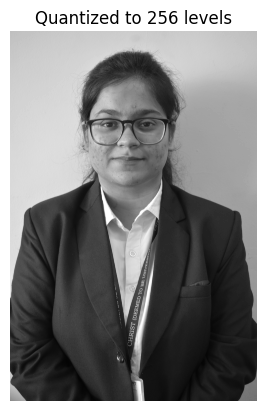

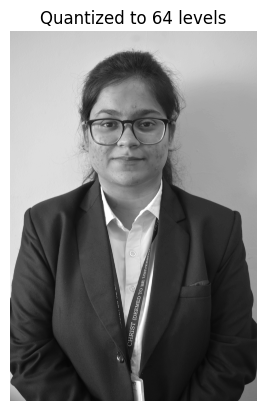

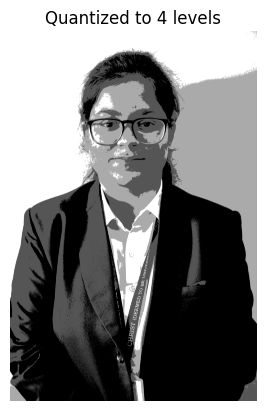

In [11]:
import numpy as np

# Function to quantize image
def quantize_image(image, levels):
    quantized = np.floor(image / (256 / levels)) * (256 / levels)
    return quantized.astype(np.uint8)

quantization_levels = [256, 64, 4]
quantized_images = []

for levels in quantization_levels:
    quantized = quantize_image(gray_image, levels)
    quantized_images.append(quantized)

    # Display quantized images
    plt.imshow(quantized, cmap='gray')
    plt.title(f"Quantized to {levels} levels")
    plt.axis('off')
    plt.show()

VISUAL AND QUANTITATIVE ANALYSIS

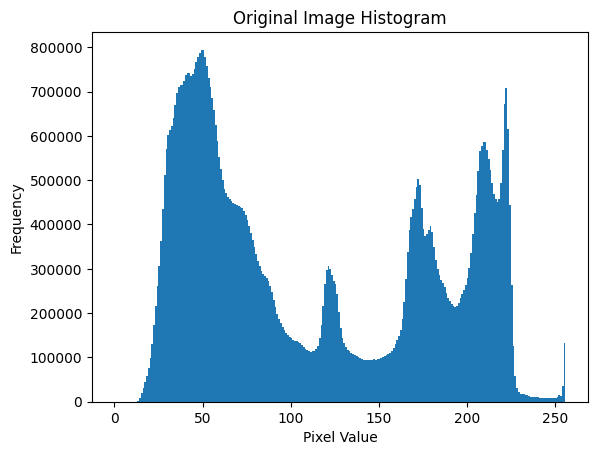

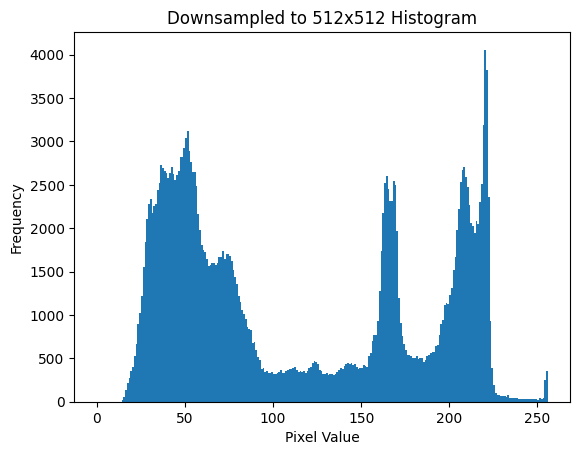

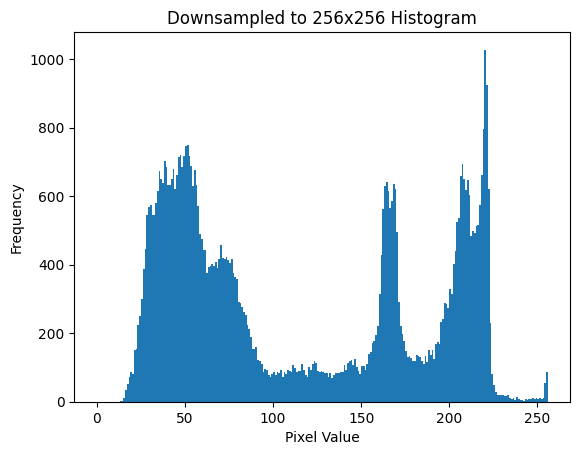

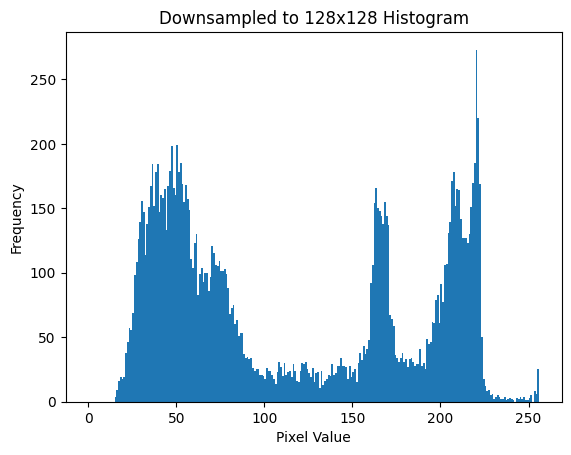

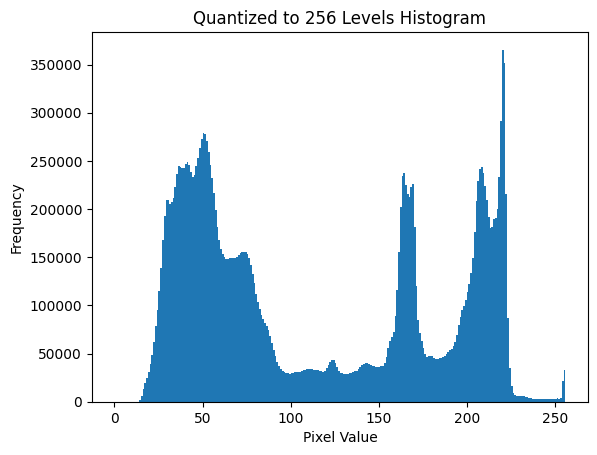

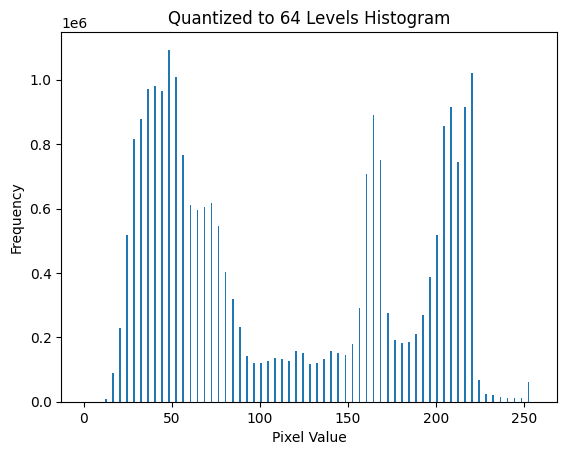

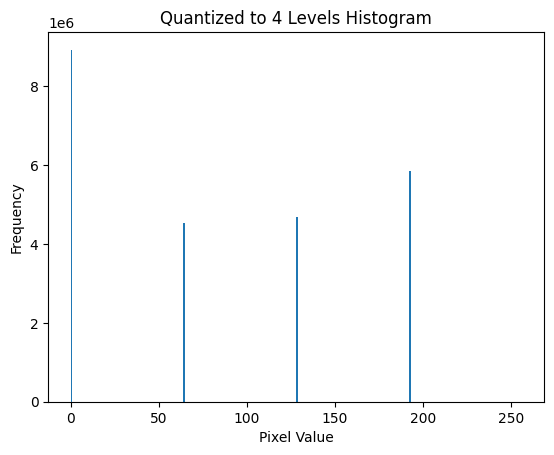

In [12]:
def plot_histogram(image, title):
    plt.hist(image.ravel(), bins=256, range=[0, 256])
    plt.title(title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

# Plot histogram for original grayscale image
plot_histogram(image, "Original Image Histogram")

# Plot histograms for downsampled images
for i, res in enumerate(resolutions):
    plot_histogram(downsampled_images[i], f"Downsampled to {res}x{res} Histogram")

# Plot histograms for quantized images
for i, levels in enumerate(quantization_levels):
    plot_histogram(quantized_images[i], f"Quantized to {levels} Levels Histogram")

ERROR METRICS

In [13]:
from sklearn.metrics import mean_squared_error

# Function to calculate MSE between two images
def calculate_mse(original, modified):
    return mean_squared_error(original.flatten(), modified.flatten())

# Calculate and print MSE for downsampled images
for i, res in enumerate(resolutions):
    mse_downsampled = calculate_mse(gray_image, cv2.resize(downsampled_images[i], (gray_image.shape[1], gray_image.shape[0]), interpolation=cv2.INTER_NEAREST))
    print(f"MSE between original and downsampled to {res}x{res}: {mse_downsampled}")

# Calculate and print MSE for quantized images
for i, levels in enumerate(quantization_levels):
    mse_quantized = calculate_mse(gray_image, quantized_images[i])
    print(f"MSE between original and quantized to {levels} levels: {mse_quantized}")

MSE between original and downsampled to 512x512: 19.656534375
MSE between original and downsampled to 256x256: 24.385822166666667
MSE between original and downsampled to 128x128: 31.01861975
MSE between original and quantized to 256 levels: 0.0
MSE between original and quantized to 64 levels: 3.48504725
MSE between original and quantized to 4 levels: 110.10873191666667


MSE will increase as image quality decreases (either due to downsampling or quantization).<br>
 Larger errors correspond to more visible artifacts and reduced image fidelity.<br>
Comparing the MSE values will help you quantify the trade-offs in image quality when reducing resolution or quantization levels.